# Zillow Neighborhood Dataset Analysis 



- It is strongly recommended you use the standard `pd`, `np`, `plt` and `sns` namespaces for these popular libraries


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load the Zillow dataset

In [2]:
df = pd.read_csv("Neighborhood_Zhvi_AllHomes.csv")
df.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank   1996-04  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  135800.0   
1    Las Vegas-Henderson-Paradise        Clark County         2  119400.0   
2     New York-Newark-Jersey City     New York County         3  299500.0   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  122700.0   
4     New York-Newark-Jersey City     New York County         5  339400.0   

    1996-05   1996-06  ...  2018-10  2018-11  2018-12  2019-01  2019-02  \
0  135500.0  134900.0  ...   320400   324400   330400   336500   341000   
1  119400.0  119300.0  ...   258200   261100   263100   264300   265200   
2  299700.0  299600.0  ...  1362500  1352300  1341200  1331200  1328900   
3  122900.0  123100.0  ...   473400   475700   479200   483300   485700   
4  339900.0  340500.0  ...  1328800  1315500  1306800  1295600  1284800   

   2019-03  2019-04  2019-05  2019-06  2019-07  
0   340700   334600   328100   326100   325900  
1   265600   264800   263300   262000   261000  
2  1323500  1310900  1298700  1292500  1285100  
3   486200   487700   490000   491000   491000  
4  1279200  1269600  1260300  1259900  1264900  

[5 rows x 287 columns]

In [3]:
df.shape

(7468, 287)

## How much are homes selling for in this dataset? 

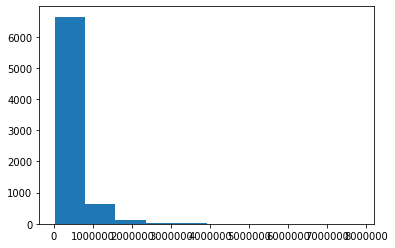

In [4]:
plt.hist(df["2019-07"]);

Yuck, that's a lot of overplotting. Let's fix it by rotating the ticks on the x-axis. 

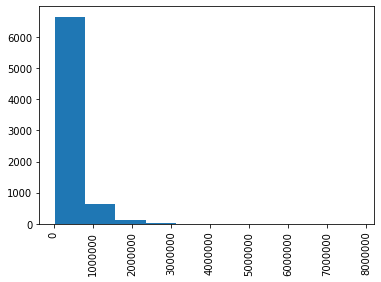

In [5]:
plt.hist(df["2019-07"]);
plt.xticks(rotation = 90);

The distribution of prices seems heavily skewed. 

How can we mitigate this so we can see the spread of the data better?

The log-transform is our friend for such heavily skewed distributions. 

(Aside: why?) 

No handles with labels found to put in legend.


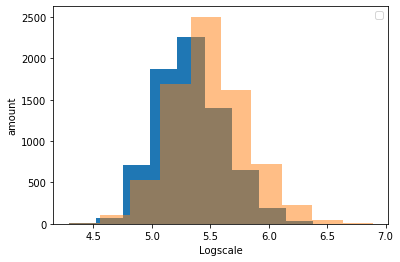

In [15]:
plt.hist(np.log10(df["2009-07"]).dropna());
plt.hist(np.log10(df["2019-07"]),alpha=0.5);
plt.xlabel("Logscale")
plt.ylabel("amount")
plt.legend()

It would be nice to compare how prices today compare to, say, 10 years ago. 

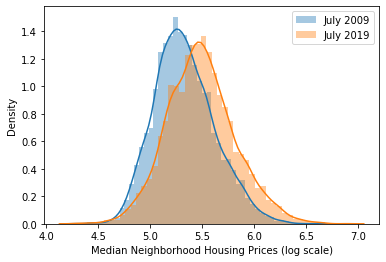

In [7]:
sns.distplot(np.log10(df["2009-07"].dropna()), label ="July 2009");
sns.distplot(np.log10(df["2019-07"]), label = "July 2019");
plt.xlabel("Median Neighborhood Housing Prices (log scale)")
plt.ylabel("Density");
plt.legend();


## San Diego Analysis

Let's focus on understanding price changes in San Diego over time.

### Tidy Data
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.


In [5]:
df.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank   1996-04  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  135800.0   
1    Las Vegas-Henderson-Paradise        Clark County         2  119400.0   
2     New York-Newark-Jersey City     New York County         3  299500.0   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  122700.0   
4     New York-Newark-Jersey City     New York County         5  339400.0   

    1996-05   1996-06  ...  2018-10  2018-11  2018-12  2019-01  2019-02  \
0  135500.0  134900.0  ...   320400   324400   330400   336500   341000   
1  119400.0  119300.0  ...   258200   261100   263100   264300   265200   
2  299700.0  299600.0  ...  1362500  1352300  1341200  1331200  1328900   
3  122900.0  123100.0  ...   473400   475700   479200   483300   485700   
4  339900.0  340500.0  ...  1328800  1315500  1306800  1295600  1284800   

   2019-03  2019-04  2019-05  2019-06  2019-07  
0   340700   334600   328100   326100   325900  
1   265600   264800   263300   262000   261000  
2  1323500  1310900  1298700  1292500  1285100  
3   486200   487700   490000   491000   491000  
4  1279200  1269600  1260300  1259900  1264900  

[5 rows x 287 columns]

- Our data is not tidy! 
Each price for each year is a different observation so should be in different row!

- `pd.melt` reshapes our data into the tidy format

In [6]:
df_m = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 
                            'Metro', 'CountyName','SizeRank'])

df_m.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank variable  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  1996-04   
1    Las Vegas-Henderson-Paradise        Clark County         2  1996-04   
2     New York-Newark-Jersey City     New York County         3  1996-04   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  1996-04   
4     New York-Newark-Jersey City     New York County         5  1996-04   

      value  
0  135800.0  
1  119400.0  
2  299500.0  
3  122700.0  
4  339400.0

In [18]:
df_m.shape

(2091040, 9)

In [7]:
df_sd = df_m[df_m.CountyName == 'San Diego County']

df_sd.head()
df_la = df_m[df_m.CountyName == "Los Angeles County"]
df_la.head()

RegionID             RegionName         City State  \
3     118208      South Los Angeles  Los Angeles    CA   
7     268496  Southeast Los Angeles  Los Angeles    CA   
17     32059              Hollywood  Los Angeles    CA   
49    276476       North Long Beach   Long Beach    CA   
58    274514               Mid City  Los Angeles    CA   

                             Metro          CountyName  SizeRank variable  \
3   Los Angeles-Long Beach-Anaheim  Los Angeles County         4  1996-04   
7   Los Angeles-Long Beach-Anaheim  Los Angeles County         8  1996-04   
17  Los Angeles-Long Beach-Anaheim  Los Angeles County        18  1996-04   
49  Los Angeles-Long Beach-Anaheim  Los Angeles County        50  1996-04   
58  Los Angeles-Long Beach-Anaheim  Los Angeles County        59  1996-04   

       value  
3   122700.0  
7   111400.0  
17  145500.0  
49  127000.0  
58  167400.0

Lets explore how the median price of homes in each region has changed over time. 

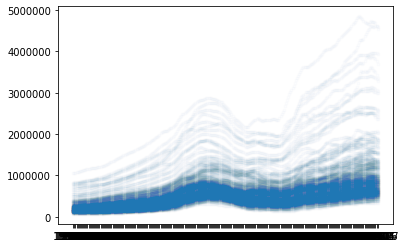

In [9]:
#plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.plot(df_la.variable, df_la.value, '.', alpha = .01);


- We get a good idea of the trends but over-plotting on the x-ticks makes it impossible to read. 

- We need to reduce the resolution of the x-ticks. 

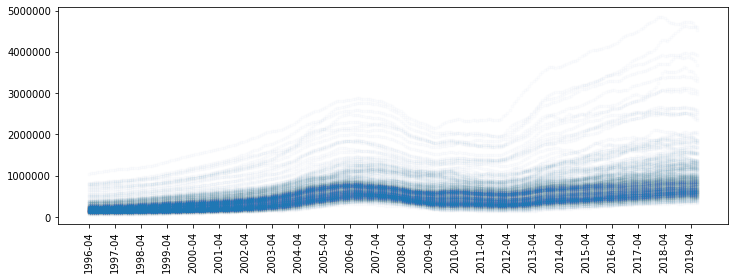

In [12]:
plt.figure(figsize=(12,4))
#plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.plot(df_la.variable, df_la.value, '.', alpha = .01);

# create the text to use for labels for every 12 months
labels = []
pos = []
for i, item in enumerate(pd.unique(df_la.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item)

plt.xticks(pos, labels, rotation = 90);


This chart looks much better and shows the how prices or different regions are changing over time. It would be nice to know how a *specific* neighborhood's prices change. 

Let's get the list of all region names available to us in San Diego. 

In [40]:
#region_names = list(pd.unique(df_sd.RegionName))
region_names = list(pd.unique(df_la.RegionName))
len(region_names)
df_la['RegionIDnName'] = df_la['RegionName'] + ' ' + df_la['RegionID'].apply(str)
df_la.head()
df_la[df_la.RegionName=='East Village']
region_names_ids = list(pd.unique(df_la.RegionIDnName))



c:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


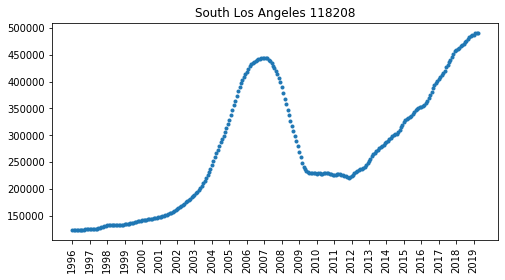

In [43]:
plt.figure(figsize=(8,4))
#df_region = df_sd[df_sd.RegionName == region_names[0]]
df_region = df_la[df_la.RegionIDnName == region_names_ids[0]]

plt.plot(df_region.variable, df_region.value, '.')
labels = []
pos = []
for i, item in enumerate(pd.unique(df_region.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item.split("-")[0])      
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names_ids[0]);

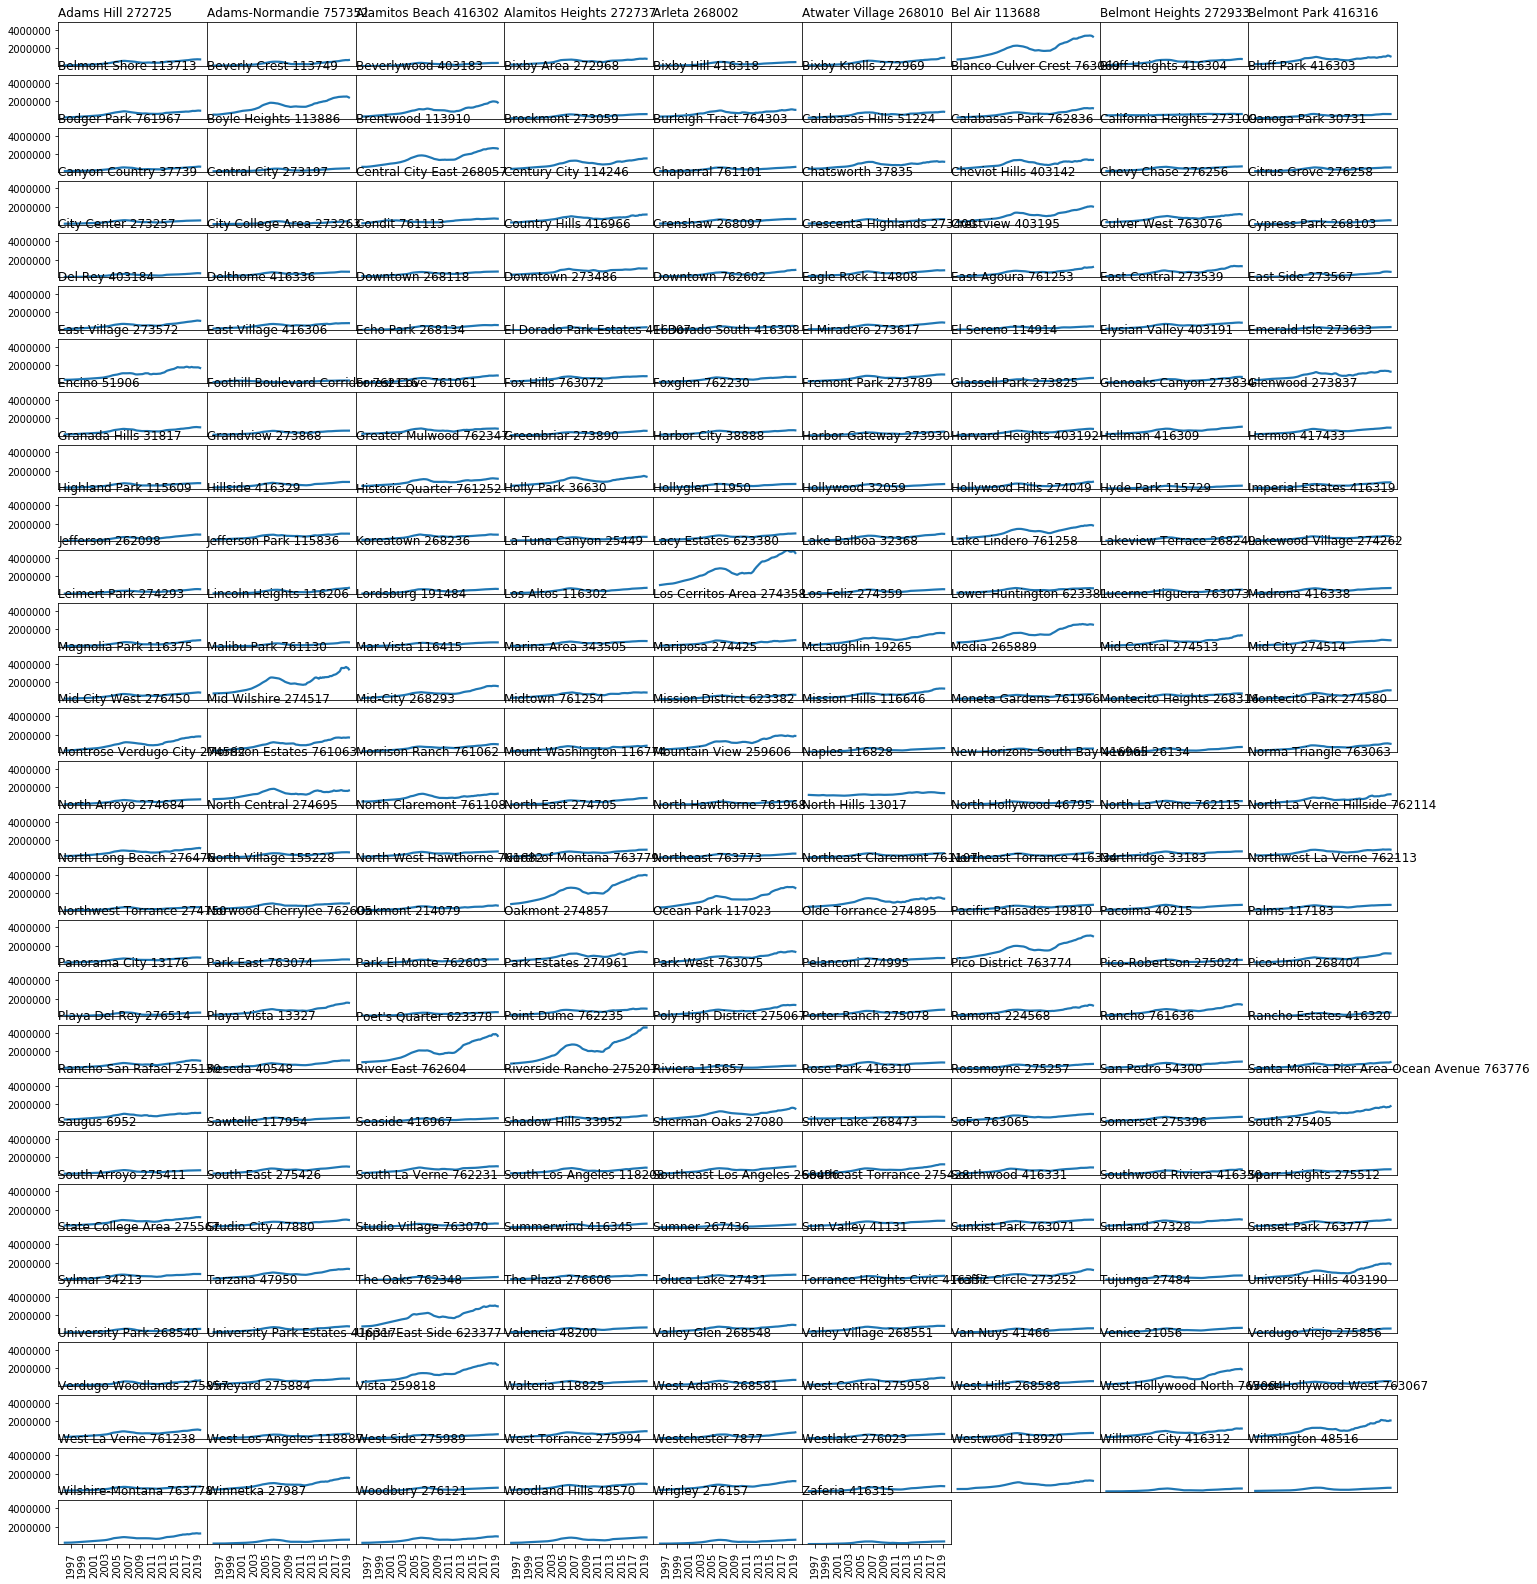

In [44]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 9
#for i, region_name in enumerate(sorted(region_names)):
for i, region_names_id in enumerate(sorted(region_names_ids)):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # subset the data to just a specific region 
    #df_region = df_sd[df_sd.RegionName == region_name]
    df_region = df_la[df_la.RegionIDnName == region_names_id]
    
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             label = region_names_id)
    # make sure the vertical axis of each sub-plot has the same scale
    #plt.ylim([np.min(df_sd.value), np.max(df_sd.value)])
    plt.ylim([np.min(df_la.value), np.max(df_la.value)])
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_names_id, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

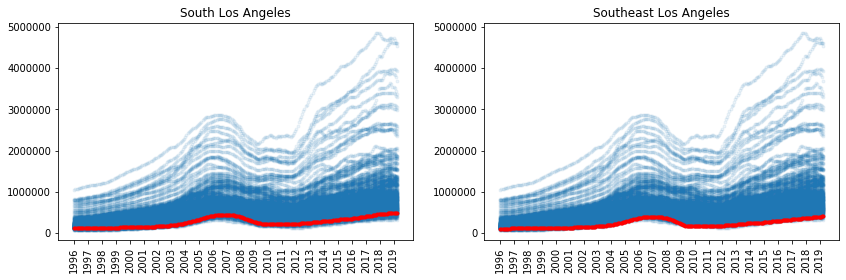

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
#df_region = df_sd[df_sd.RegionName == region_names[0]]
df_region = df_la[df_la.RegionName == region_names[0]]

#plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_la.variable, df_la.value, '.', alpha = .08);

plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

plt.subplot(1,2,2)
#df_region = df_sd[df_sd.RegionName == region_names[1]]
df_region = df_la[df_la.RegionName == region_names[1]]

plt.plot(df_la.variable, df_la.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



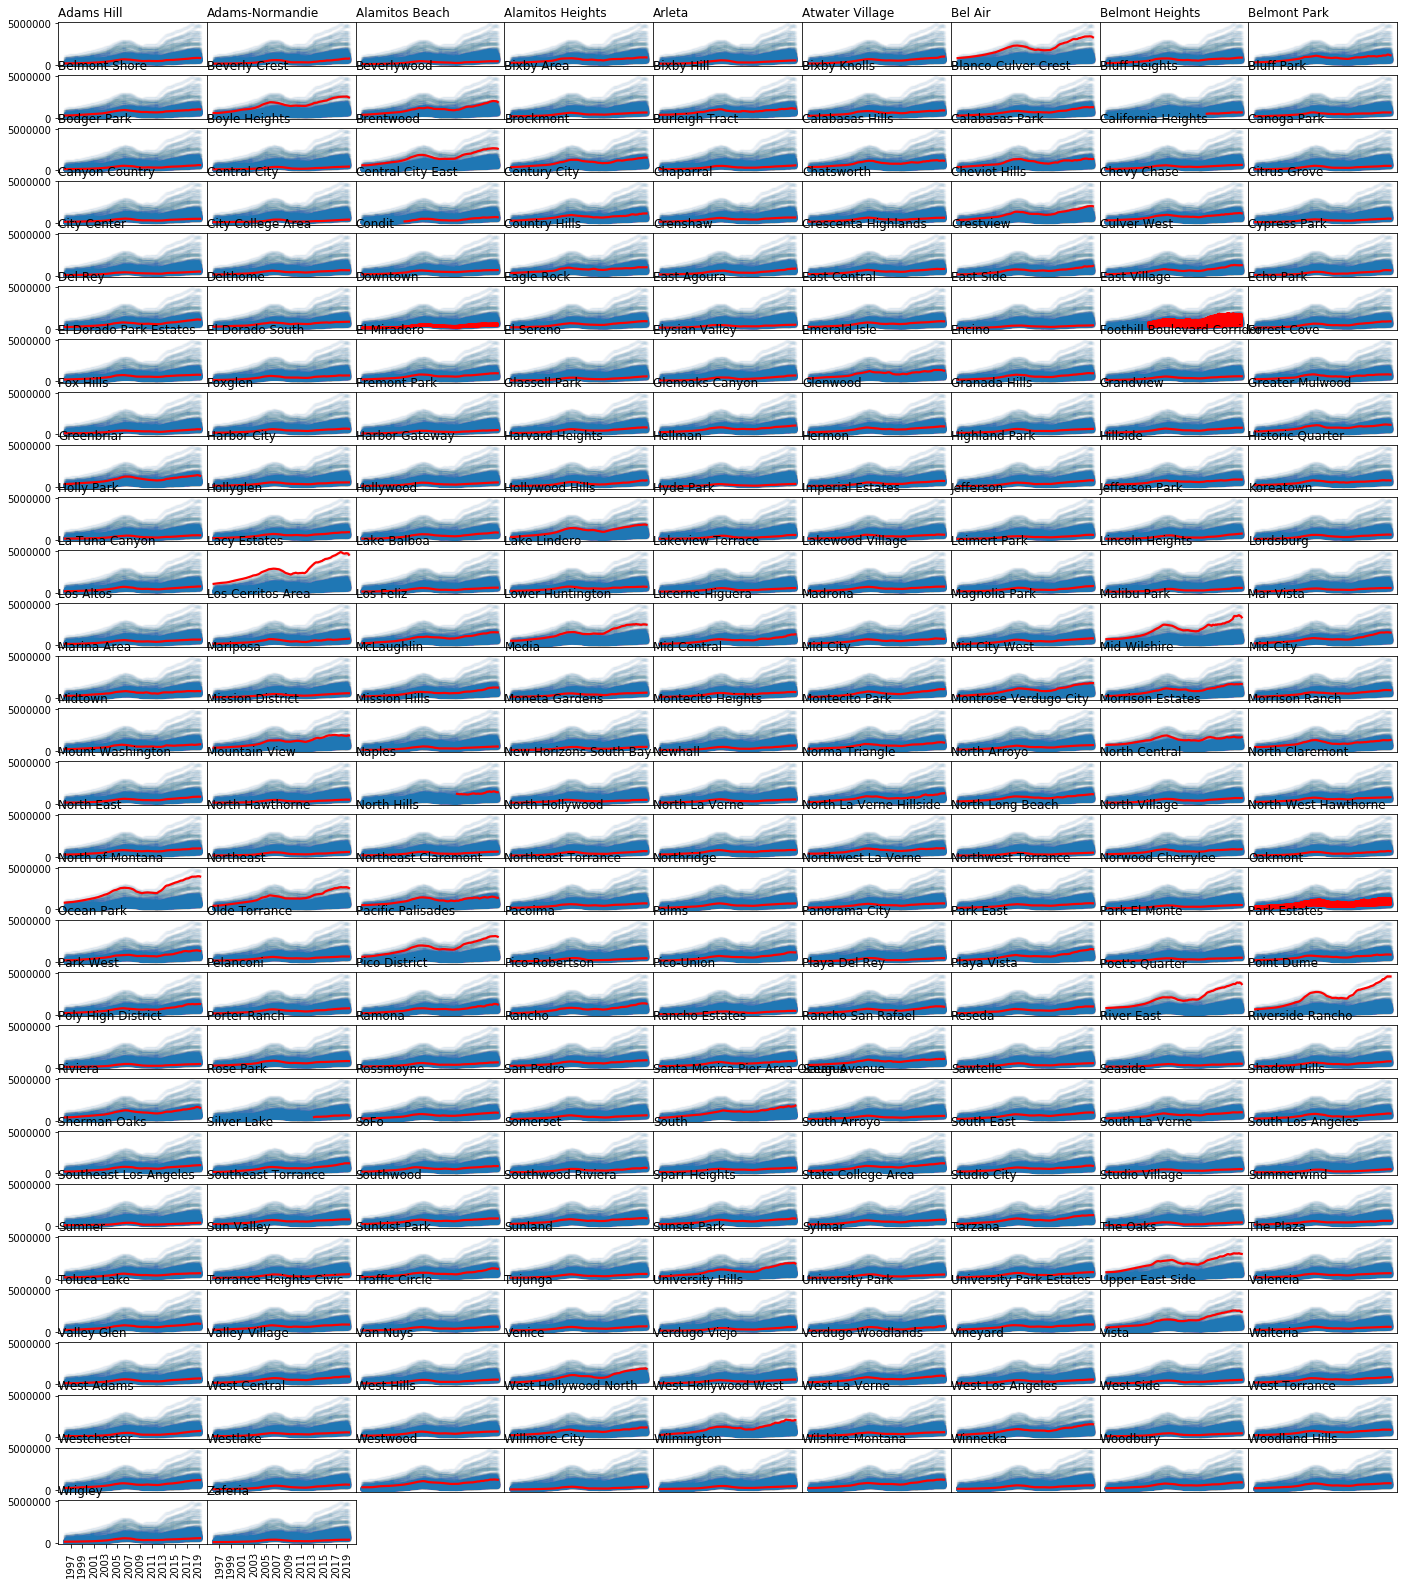

In [48]:
plt.figure(figsize = (24,28))

num_cols_in_subplot = 9

for i, region_name in enumerate(sorted(region_names)):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # plot all the regions but very lightly small alpha
    # plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
    plt.plot(df_la.variable, df_la.value, '.', alpha = .01);
    
    # subset the data to just a specific region 
    #df_region = df_sd[df_sd.RegionName == region_name]
    df_region = df_la[df_la.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             color = "red", label = region_name)
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

### Bubble Analysis

- The peak of the bubble occurred around 2005. 
- Instead of looking at prices at all time points in the data, lets compare prices at the height of the bubble with today. 
- We pick July 2005 as the "height" to correspond with the 14 years prior to the latest observations we have. 

In [68]:
#df_latest = df_sd[df_sd.variable == df_sd.variable.max()]
df_latest = df_la[df_la.variable == df_la.variable.max()]
#df_bubble = df_sd[df_sd.variable == '2005-07']
df_bubble = df_la[df_la.variable == '2005-07']
df_change = pd.concat([df_bubble, df_latest], ignore_index=True)
df_change.head()
df_change.tail()

RegionID              RegionName       City State  \
511    416345              Summerwind   Torrance    CA   
512    273059               Brockmont   Glendale    CA   
513    761107     Northeast Claremont  Claremont    CA   
514    416965  New Horizons South Bay   Torrance    CA   
515     51224         Calabasas Hills  Calabasas    CA   

                              Metro          CountyName  SizeRank variable  \
511  Los Angeles-Long Beach-Anaheim  Los Angeles County      7210  2019-07   
512  Los Angeles-Long Beach-Anaheim  Los Angeles County      7220  2019-07   
513  Los Angeles-Long Beach-Anaheim  Los Angeles County      7248  2019-07   
514  Los Angeles-Long Beach-Anaheim  Los Angeles County      7251  2019-07   
515  Los Angeles-Long Beach-Anaheim  Los Angeles County      7355  2019-07   

         value                  RegionIDnName  
511   630900.0              Summerwind 416345  
512  1520600.0               Brockmont 273059  
513  1384300.0     Northeast Claremont 761107  
514   470200.0  New Horizons South Bay 416965  
515  1157200.0          Calabasas Hills 51224

## Slope Graphs

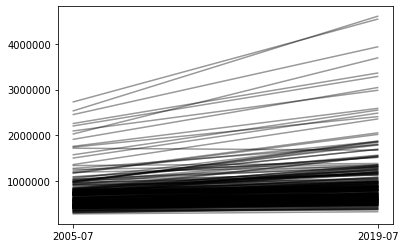

In [51]:
# for i, region_name in enumerate(region_names):
#     df_region = df_change[df_change.RegionName == region_name]
#     plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
for i, region_name_id in enumerate(region_names_ids):
    df_region = df_change[df_change.RegionIDnName == region_name_id]
    plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)


We have too much over-plotting! 

Over-plotting solution: only plot the regions that have "large" changes. Might be also interesting to look at regions that went "negative" (have yet to recover from the crash). 

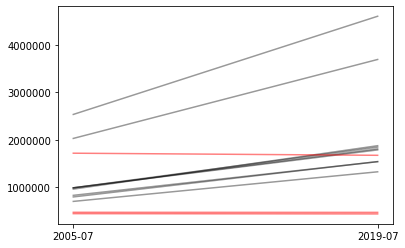

In [72]:
# for i, region_name in enumerate(region_names):
#     df_region = df_change[df_change.RegionName == region_name]
#     change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
#     percent_change = 100*change/df_region.iloc[0,:]["value"]
#     if (change > 0) & (percent_change > 30):
#         plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
#     elif (change < 0) & (percent_change < -5):
#         plt.plot(df_region.variable, df_region.value, color = "r", alpha = .5)
for i, region_name_id in enumerate(region_names_ids):
    df_region = df_change[df_change.RegionIDnName == region_name_id]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 80):
        plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
    elif (change < 0) & (percent_change < 0):
        plt.plot(df_region.variable, df_region.value, color = "r", alpha = .5)

RegionID       RegionName       City State  \
257     51224  Calabasas Hills  Calabasas    CA   
515     51224  Calabasas Hills  Calabasas    CA   

                              Metro          CountyName  SizeRank variable  \
257  Los Angeles-Long Beach-Anaheim  Los Angeles County      7355  2005-07   
515  Los Angeles-Long Beach-Anaheim  Los Angeles County      7355  2019-07   

         value          RegionIDnName  
257  1017300.0  Calabasas Hills 51224  
515  1157200.0  Calabasas Hills 51224

Which neighborhoods are the biggest movers? Which neighborhoods did not recover?

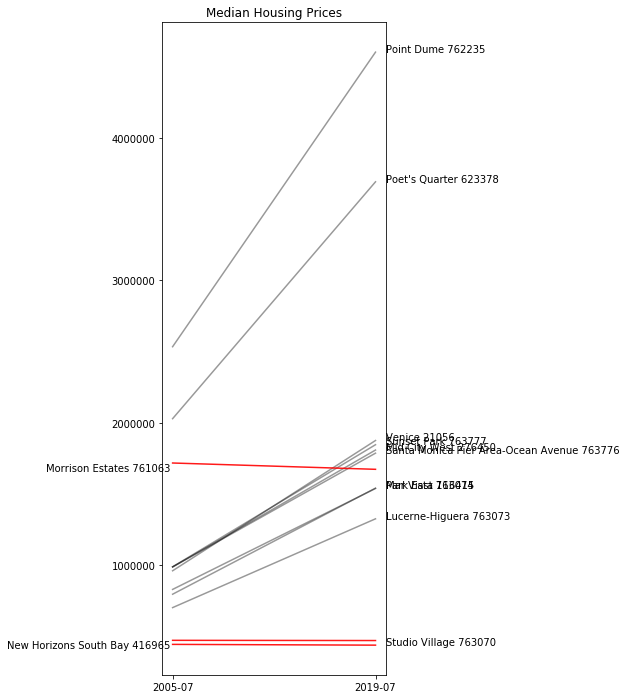

In [73]:
fig, ax = plt.subplots(figsize=(4, 12))
count = 0
# for i, region_name in enumerate(region_names):
#     df_region = df_change[df_change.RegionName == region_name]
#     change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
#     percent_change = 100*change/df_region.iloc[0,:]["value"]
#     if (change > 0) & (percent_change > 30):
#         ax.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
#         ax.text(1.05, df_region.value.iloc[1], region_name)

#     elif (change < 0) & (percent_change < -5):        
#         ax.plot(df_region.variable, df_region.value, color = "r", alpha = .9)
#         if count%2 == 0:
#             ax.text(-.01, df_region.value.iloc[0], region_name, 
#                     horizontalalignment = "right", verticalalignment = "top")
#         else:
#             ax.text(1.05, df_region.value.iloc[1], region_name,)
#         count += 1
for i, region_name_id in enumerate(region_names_ids):
    df_region = df_change[df_change.RegionIDnName == region_name_id]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 80):
        ax.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
        ax.text(1.05, df_region.value.iloc[1], region_name_id)

    elif (change < 0) & (percent_change < 0):        
        ax.plot(df_region.variable, df_region.value, color = "r", alpha = .9)
        if count%2 == 0:
            ax.text(-.01, df_region.value.iloc[0], region_name_id, 
                    horizontalalignment = "right", verticalalignment = "top")
        else:
            ax.text(1.05, df_region.value.iloc[1], region_name_id,)
        count += 1
plt.title("Median Housing Prices");       

Percent change is often much more interesting. 

In [75]:
# undo a pivot
df_sd_change = df_change.pivot(index = 'RegionName', columns = "variable", 
                               values = 'value')

df_sd_change.reset_index(inplace=True)

df_sd_change.head()

ValueError: Index contains duplicate entries, cannot reshape

We will create a new variable `percent_change` that has the percent change between the latest entry in our data with the "peak" bubble.

In [36]:
df_sd_change["percent_change"] = 100*(df_sd_change["2019-07"] - 
                                      df_sd_change["2005-07"])/df_sd_change["2005-07"]

In [37]:
np.min(df_sd_change.percent_change), np.max(df_sd_change.percent_change)

(-9.3538390910134286, 46.952025970902973)

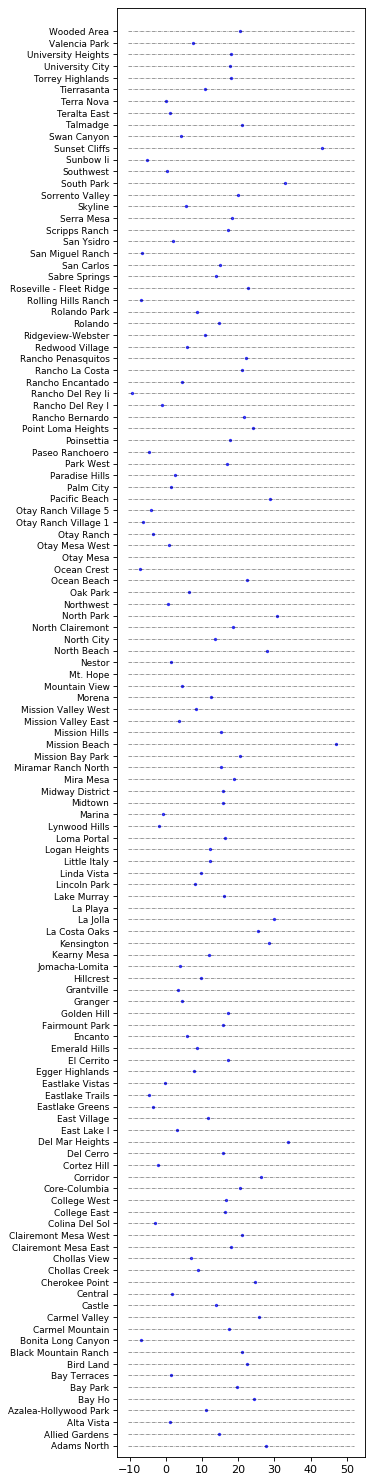

In [39]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);


ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});
ax.set_ylim(-1, 123);

Alphabetically showing data is almost never useful. It is much more informative to display in *quantitative* sort

In [40]:
df_sd_change.sort_values(["percent_change"], inplace=True)

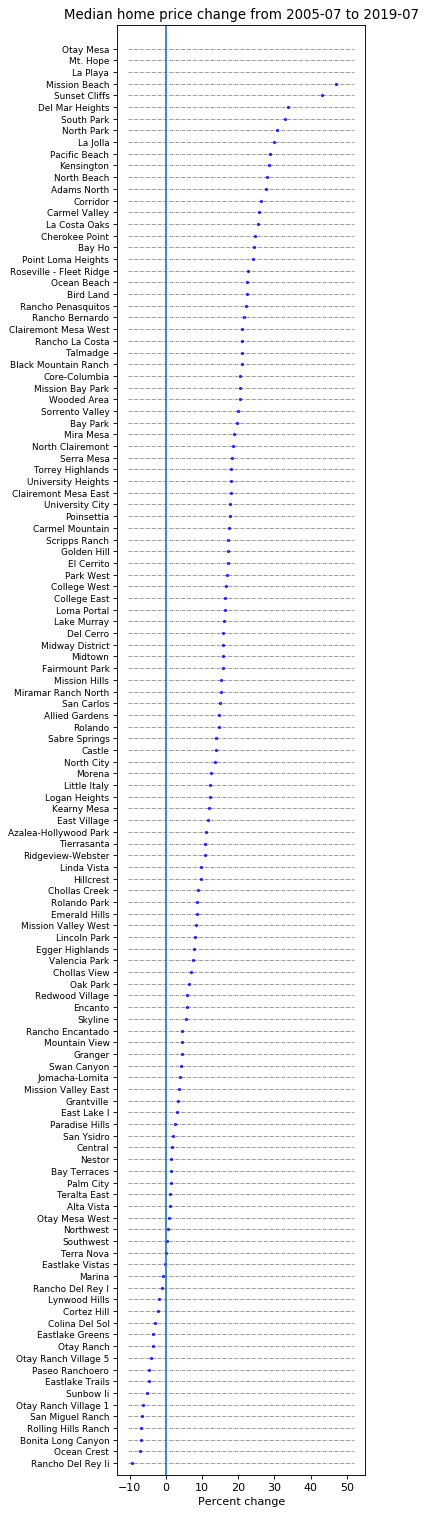

In [41]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);

ax.set_title('Median home price change from 2005-07 to 2019-07', 
             fontdict={'size':12})
ax.set_xlabel('Percent change')
ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});
ax.axvline(0)
ax.set_ylim(-1, 123);

## Price changes

In [42]:
monthly_change = df_sd.groupby("RegionName")["value"].apply(lambda x: 
                                                 100*x.diff()/np.hstack((1,x[:-1])))
df_sd["monthly_change"] = monthly_change
df_sd.head()

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


RegionID          RegionName         City State               Metro  \
84     343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
86     116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
159    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
170    118673     University City    San Diego    CA  San Diego-Carlsbad   
176    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

           CountyName  SizeRank variable     value  monthly_change  
84   San Diego County        85  1996-04  139400.0             NaN  
86   San Diego County        87  1996-04  153900.0             NaN  
159  San Diego County       160  1996-04  147600.0             NaN  
170  San Diego County       171  1996-04  175700.0             NaN  
176  San Diego County       177  1996-04  202400.0             NaN

In [43]:
df_sd.tail()

RegionID         RegionName         City State               Metro  \
2089427    343234    Eastlake Vistas  Chula Vista    CA  San Diego-Carlsbad   
2089735    343251  Rancho Del Rey II  Chula Vista    CA  San Diego-Carlsbad   
2090124    343233    Eastlake Trails  Chula Vista    CA  San Diego-Carlsbad   
2090460    403248   Rancho Encantado    San Diego    CA  San Diego-Carlsbad   
2090584    416906   San Miguel Ranch  Chula Vista    CA  San Diego-Carlsbad   

               CountyName  SizeRank variable      value  monthly_change  
2089427  San Diego County      5856  2019-07   595700.0        0.421443  
2089735  San Diego County      6164  2019-07   789800.0       -0.791358  
2090124  San Diego County      6553  2019-07   612900.0        0.228945  
2090460  San Diego County      6889  2019-07  1409600.0       -0.536269  
2090584  San Diego County      7013  2019-07   667400.0       -0.373190

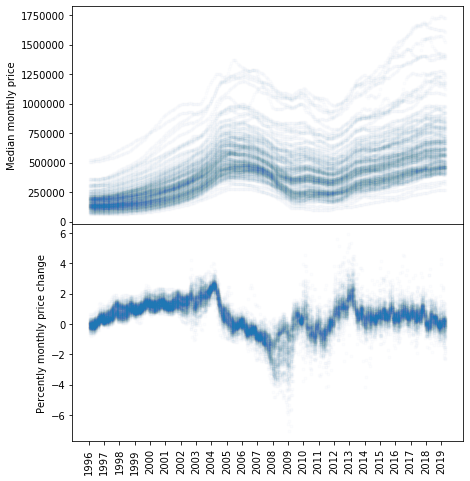

In [44]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.ylabel("Median monthly price");
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percently monthly price change")
plt.subplots_adjust(wspace=0, hspace=0)

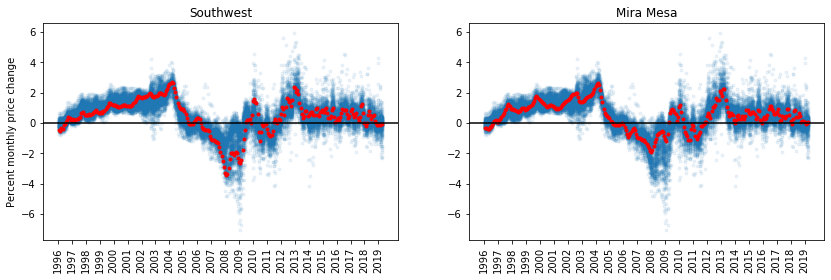

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.axhline(0, color = "k")
plt.ylabel("Percent monthly price change")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.axhline(0, color = "k");
plt.title(region_names[1]);



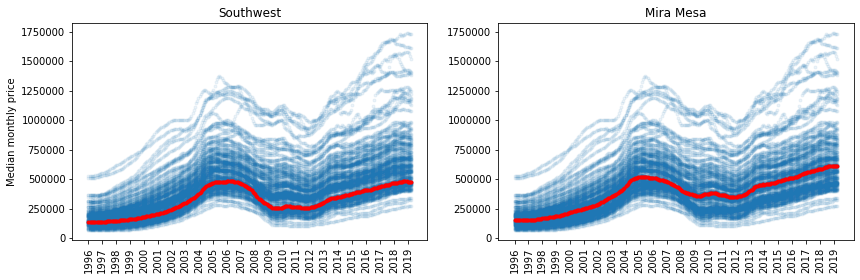

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Median monthly price")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



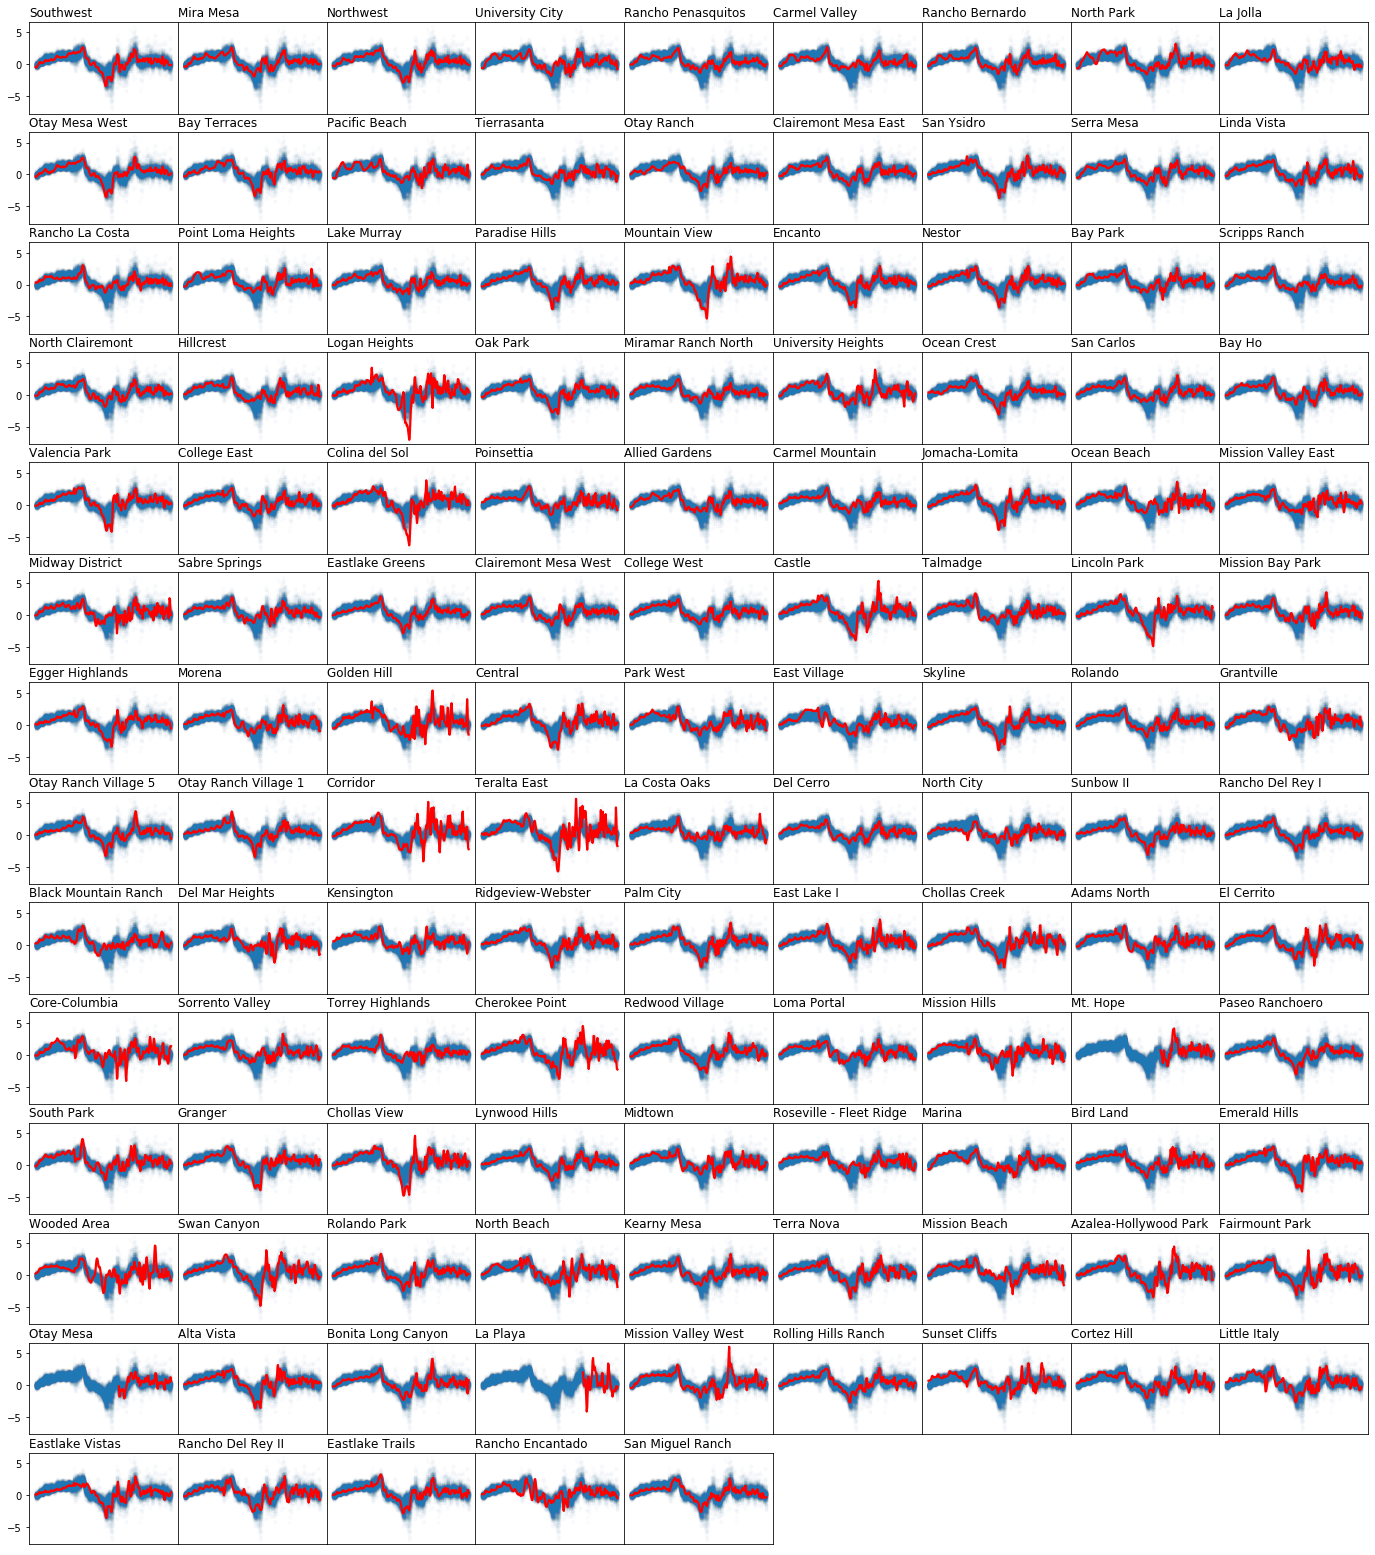

In [47]:
plt.figure(figsize = (24,28))
for i, region_name in enumerate(region_names):
    plt.subplot(14, 9, i+1)
    
    plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
    plt.xticks([]);
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.monthly_change, linewidth = 2.2, 
             color = "r", label = region_name)

    plt.xticks([]);
    if i%9 != 0:
        plt.yticks([])
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

Let's compare the distribution of percent changes between two different states: early bubble state and present state we are at in the Real Estate market. 

In [48]:
df_bubble_leadup = df_sd[(df_sd.variable>="2000-01") & (df_sd.variable<"2005-01")]

df_current_state = df_sd[(df_sd.variable>"2014-07") & (df_sd.variable<="2019-07")]

df_bubble_leadup.head()

RegionID          RegionName         City State               Metro  \
336144    343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
336146    116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
336219    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
336230    118673     University City    San Diego    CA  San Diego-Carlsbad   
336236    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

              CountyName  SizeRank variable     value  monthly_change  
336144  San Diego County        85  2000-01  172400.0        1.352146  
336146  San Diego County        87  2000-01  206300.0        1.776024  
336219  San Diego County       160  2000-01  178800.0        1.188455  
336230  San Diego County       171  2000-01  262300.0        1.587916  
336236  San Diego County       177  2000-01  291300.0        1.462905

Are the differences between the current state and the bubble state the same or different? Let's estimate some $p$-values for this.

In [49]:
from scipy import stats

In [50]:
p_vals = []
median_diffs = []
for region in region_names:
    df_bubble_leadup_region = df_bubble_leadup[df_bubble_leadup.RegionName == region].dropna()
    df_current_state_region = df_current_state[df_current_state.RegionName == region].dropna()
    if (df_bubble_leadup_region.shape[0] == 0) or (df_current_state_region.shape[0]==0):
        continue
    _, p_val = stats.ttest_ind(df_bubble_leadup_region.monthly_change, 
                               df_current_state_region.monthly_change)
    p_vals.append(p_val)
    
    median_diffs.append(np.median(np.abs(df_current_state_region.monthly_change)) - 
                        np.median(np.abs(df_bubble_leadup_region.monthly_change)))

## Volcano Plot


Volcano plots show us the relationship between the effect size and the statistical significance. The higher the effect size (more positive or more negative) and the higher on the graph (lower p-value) then the lesser chance of having False Positives. 

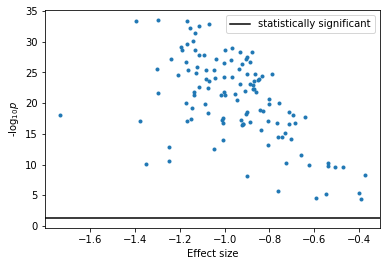

In [51]:

plt.plot(median_diffs, -np.log10(p_vals), '.');
plt.axhline(-np.log10(.05), label = "statistically significant", color = "k")
plt.legend();
plt.xlabel("Effect size")
plt.ylabel("-log$_{10}p$");

## Box Plot


To be even more convincing, let's look at the distribution of price changes during the bubble and currently. 

In [52]:
df_bubble_leadup["state"] = "bubble"
df_current_state["state"] = "current"


df_box_plot = pd.concat([df_bubble_leadup, df_current_state], axis = 0)

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


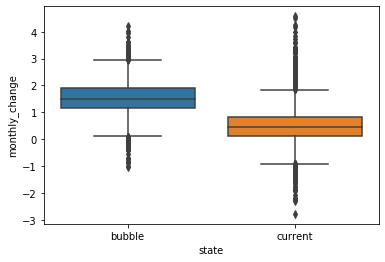

In [53]:

ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot)


The box plot summarizes the data effectively, but the raw data is hidden. It would be nice to see some of the actual data itself. 

c:\python36\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
c:\python36\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


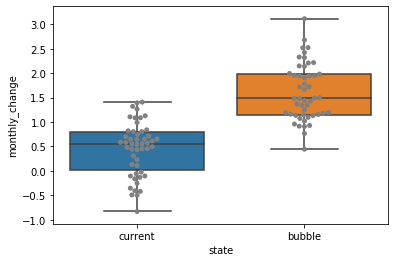

In [54]:
np.random.seed(100)
ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot.sample(100))
np.random.seed(100)
ax = sns.swarmplot(x='state', y='monthly_change', data=df_box_plot.sample(100), color="grey")
